## Imported Lib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Load datasets

In [2]:
benin_df = pd.read_csv('data/benin-malanville.csv')
sl_df = pd.read_csv('data/sierraleone-bumbuna.csv')
tg_df = pd.read_csv('data/togo-dapaong_qc.csv')

## Display first rows

In [3]:
print("Benin Data:")
print(benin_df.head())
print("\nSierra Leone Data:")
print(sl_df.head())
print("\nTogo Data:")
print(tg_df.head())

Benin Data:
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  

Sierra 

## Check data types and missing values

In [4]:
print("\nBenin Info:")
print(benin_df.info())
print("\nSierra Leone Info:")
print(sl_df.info())
print("\nTogo Info:")
print(tg_df.info())


Benin Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          5

## Summary statistics

In [5]:
print("\nBenin Summary:")
print(benin_df.describe())
print("\nSierra Leone Summary:")
print(sl_df.describe())
print("\nTogo Summary:")
print(tg_df.describe())


Benin Summary:
                 GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000   
25%         0.000

## Check missing values

In [6]:
print("Benin Missing Values:")
print(benin_df.isnull().sum())
print("\nSierra Leone Missing Values:")
print(sl_df.isnull().sum())
print("\nTogo Missing Values:")
print(tg_df.isnull().sum())

Benin Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Sierra Leone Missing Values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Togo Miss

## Check for negative irradiance values (potential outliers)

In [7]:
key_columns = ['GHI', 'DNI', 'DHI']  # Adjust if columns differ
for col in key_columns:
    if col in benin_df.columns:
        print(f"\nBenin Negative {col}:", (benin_df[col] < 0).sum())
    if col in sl_df.columns:
        print(f"Sierra Leone Negative {col}:", (sl_df[col] < 0).sum())
    if col in tg_df.columns:
        print(f"Togo Negative {col}:", (tg_df[col] < 0).sum())


Benin Negative GHI: 258847
Sierra Leone Negative GHI: 261135
Togo Negative GHI: 257385

Benin Negative DNI: 275987
Sierra Leone Negative DNI: 266352
Togo Negative DNI: 0

Benin Negative DHI: 259182
Sierra Leone Negative DHI: 263128
Togo Negative DHI: 0


## Convert Timestamp to datetime (adjust column name if different)

In [8]:
benin_df['Timestamp'] = pd.to_datetime(benin_df['Timestamp'])
sl_df['Timestamp'] = pd.to_datetime(sl_df['Timestamp'])
tg_df['Timestamp'] = pd.to_datetime(tg_df['Timestamp'])

## Time series plot for GHI

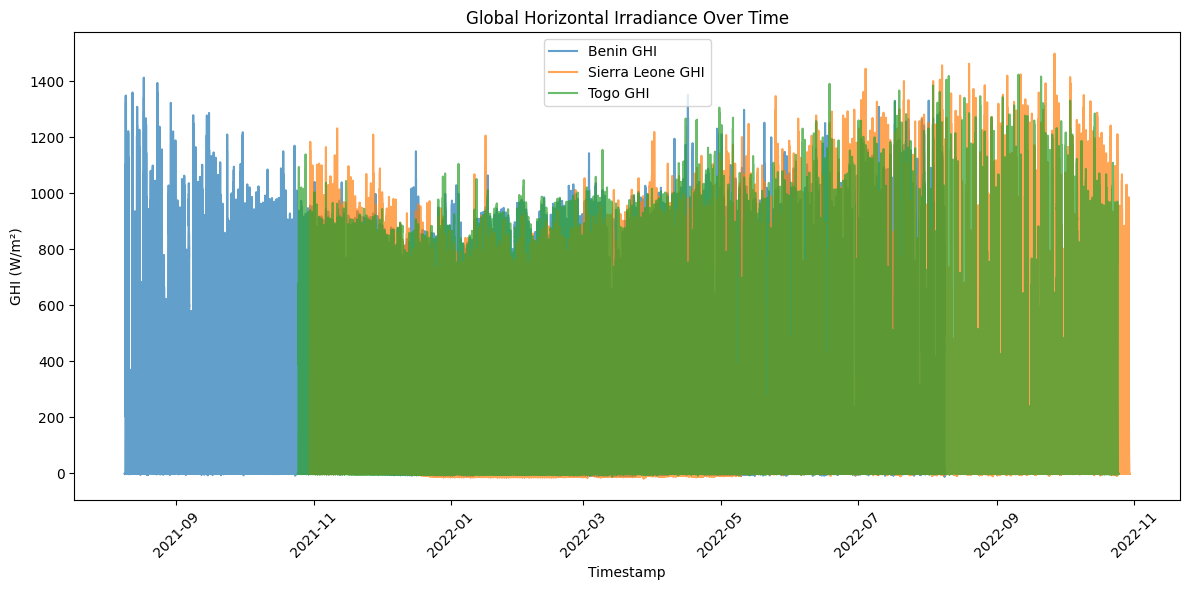

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(benin_df['Timestamp'], benin_df['GHI'], label='Benin GHI', alpha=0.7)
plt.plot(sl_df['Timestamp'], sl_df['GHI'], label='Sierra Leone GHI', alpha=0.7)
plt.plot(tg_df['Timestamp'], tg_df['GHI'], label='Togo GHI', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.title('Global Horizontal Irradiance Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Correlation heatmap for Benin

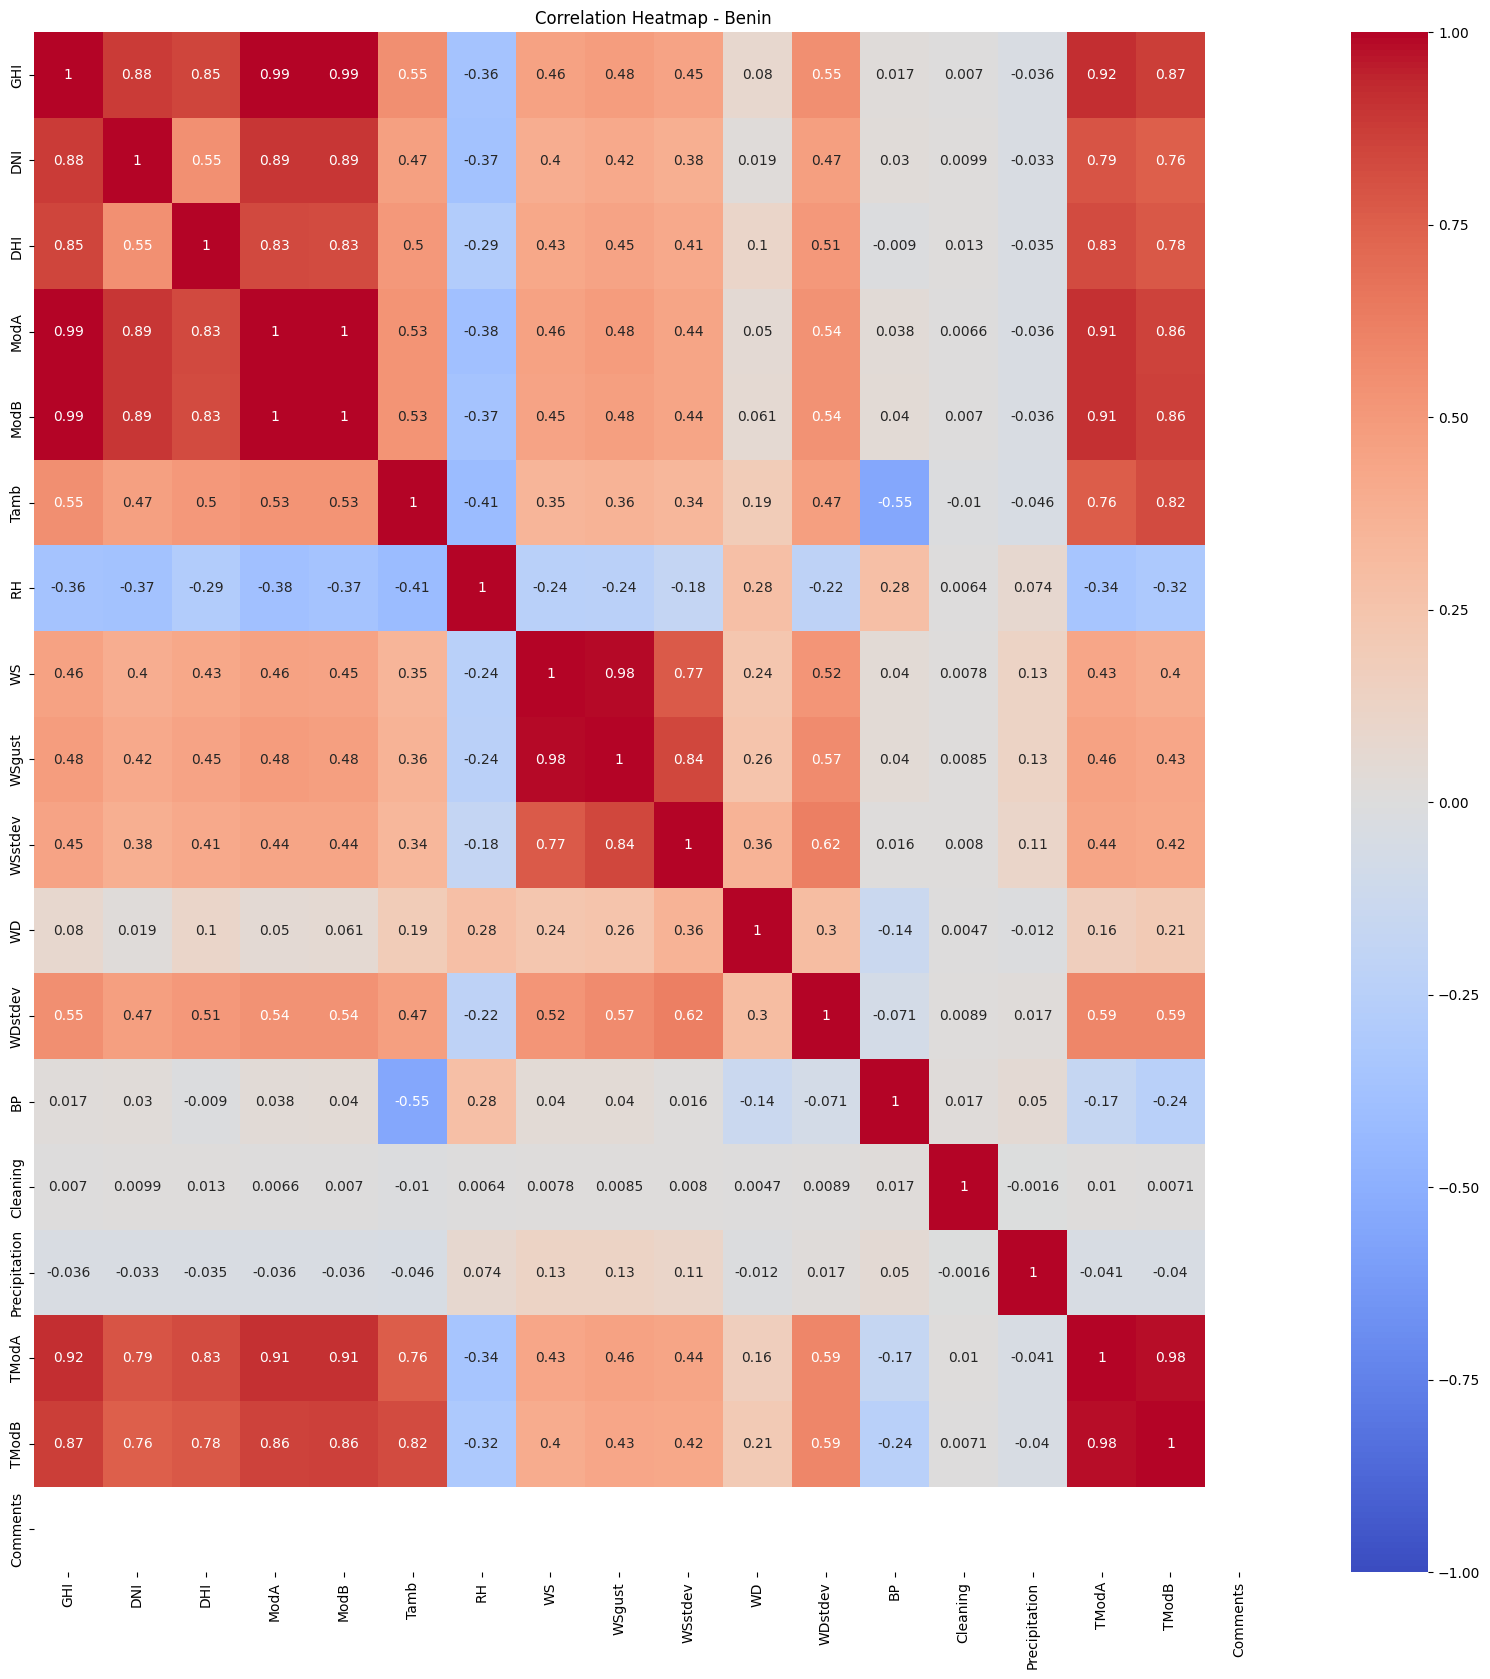

In [10]:
numeric_cols = benin_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 20))
sns.heatmap(benin_df[numeric_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Benin')
plt.show()

## Correlation heatmap for Sierra Leone

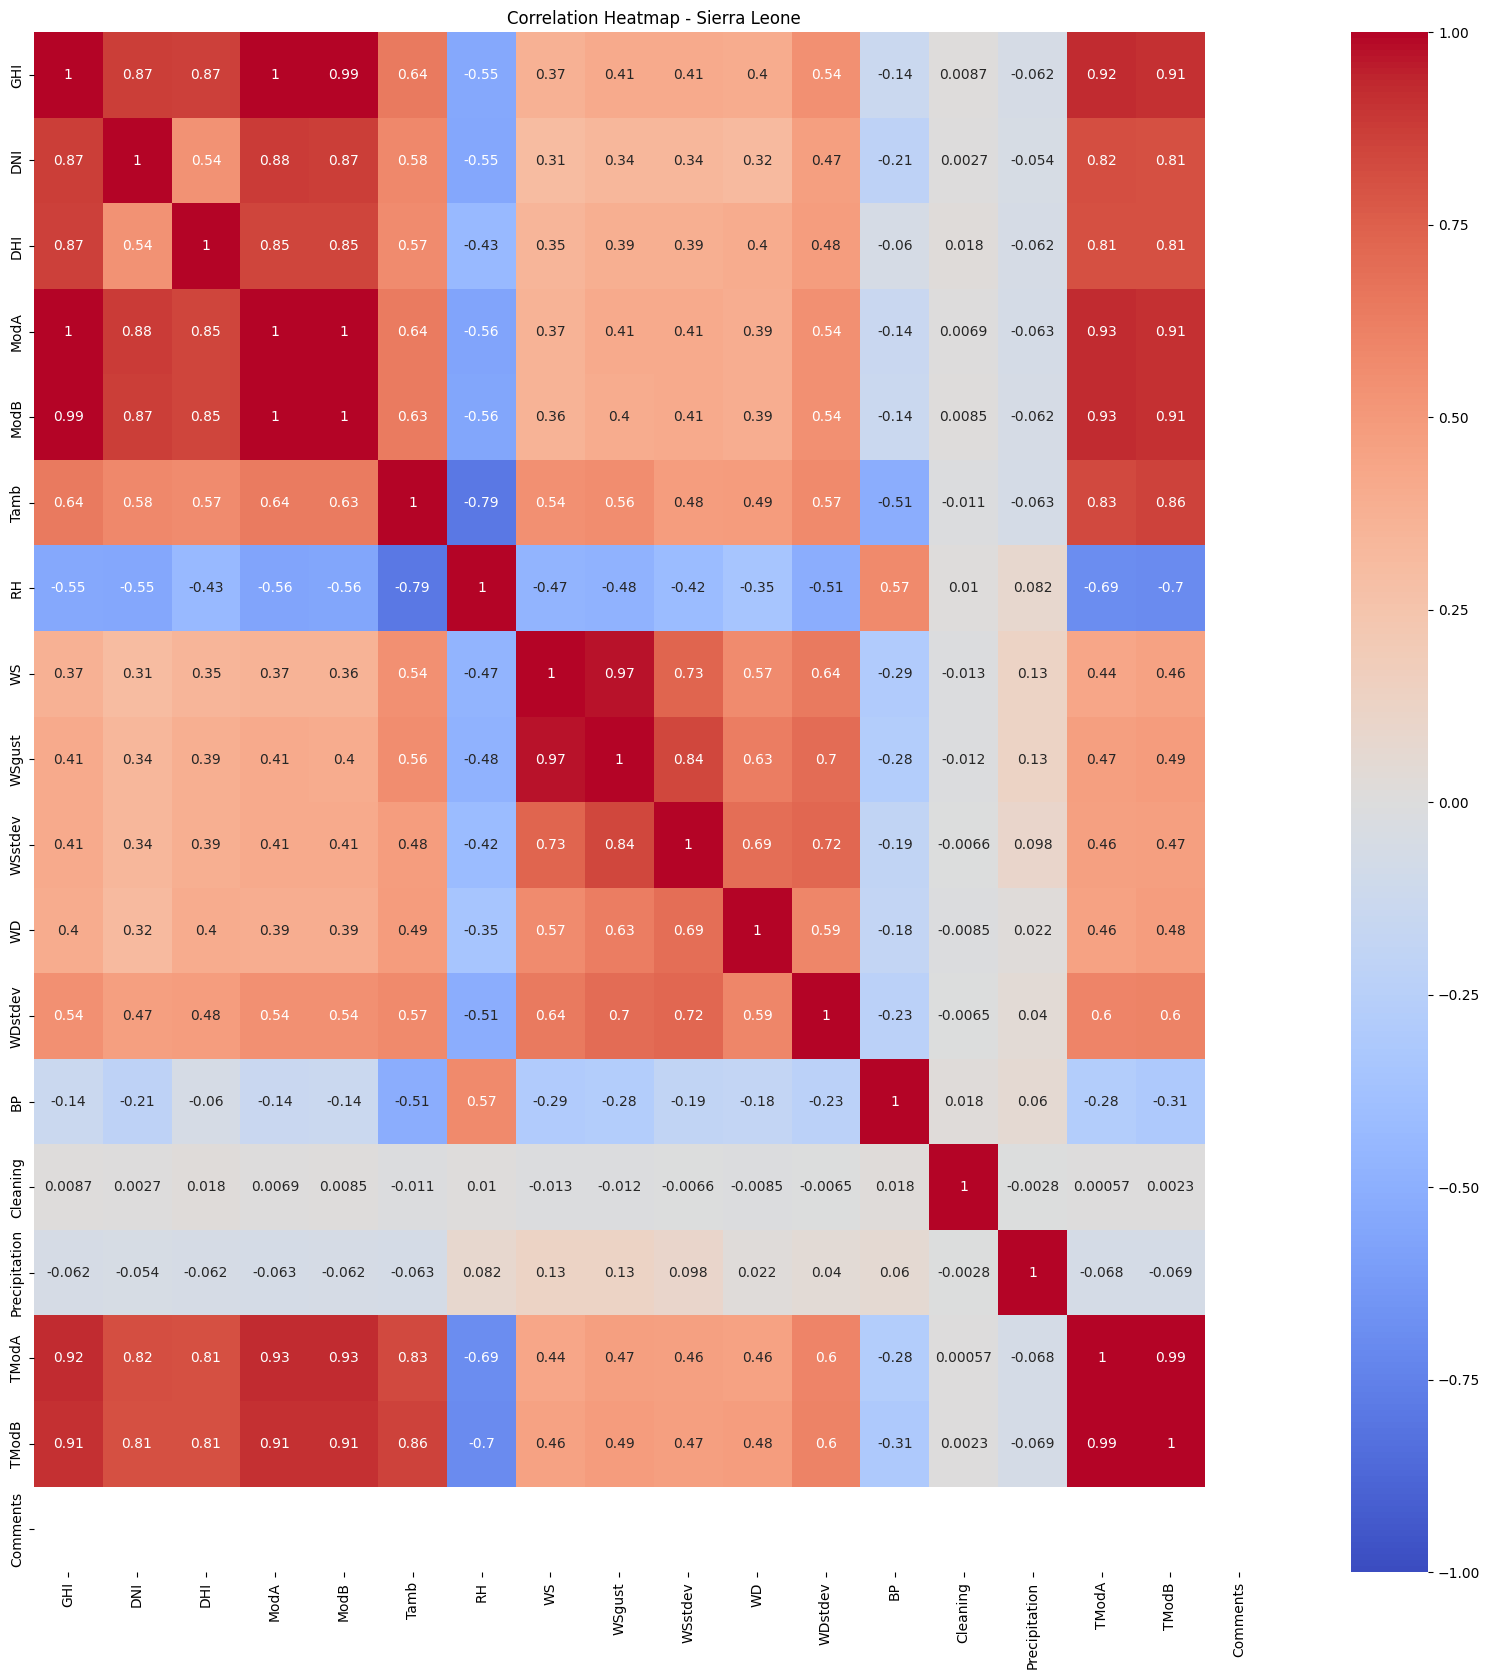

In [11]:
numeric_cols_sl = sl_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 20))
sns.heatmap(sl_df[numeric_cols_sl].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Sierra Leone')
plt.show()

## Correlation heatmap for Togo

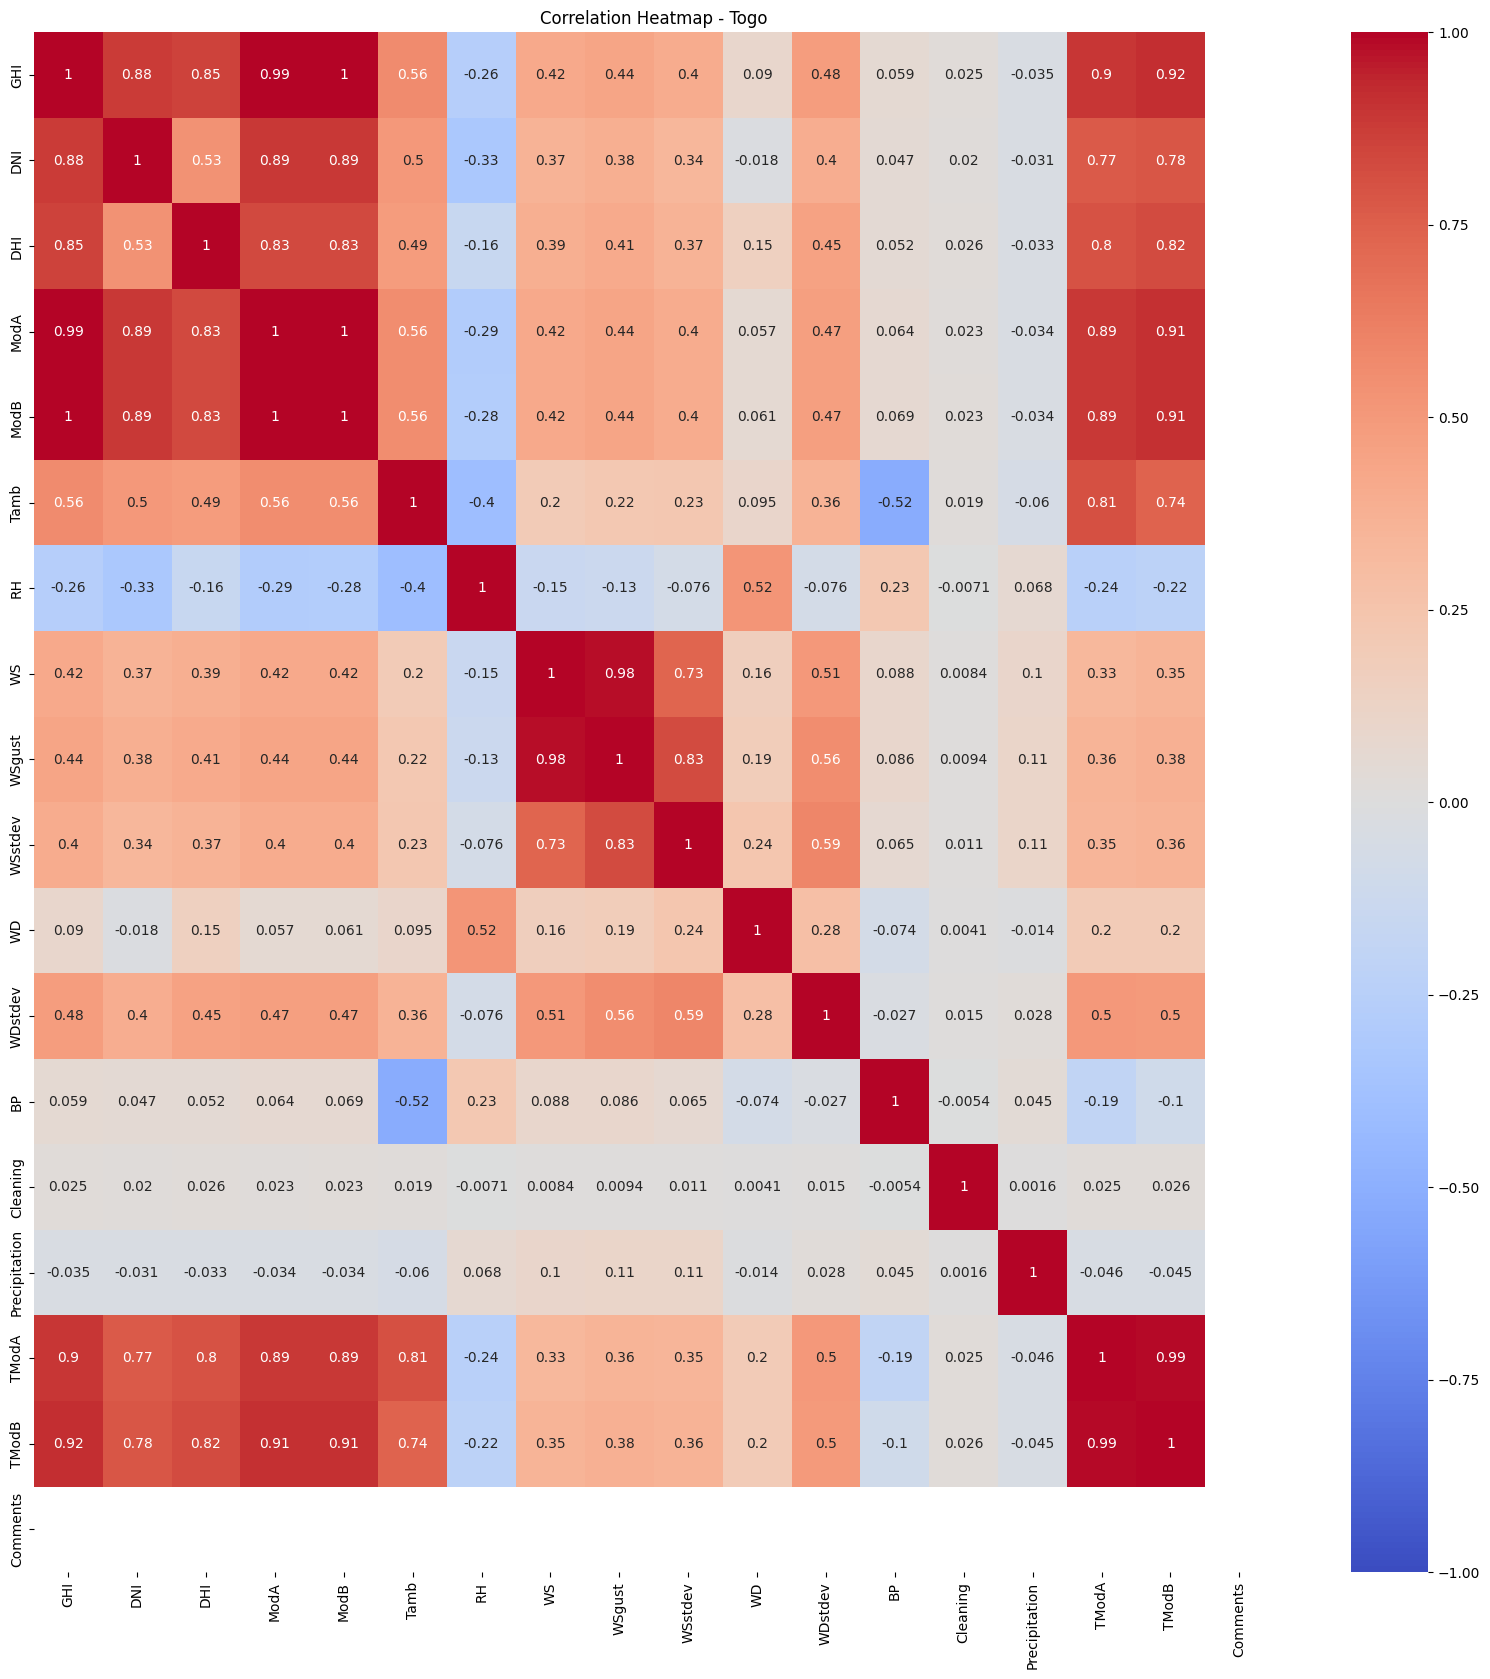

In [12]:
numeric_cols_tg = tg_df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 20))
sns.heatmap(tg_df[numeric_cols_tg].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap - Togo')
plt.show()

## Correlation Analysis
- **Benin**: [e.g., Strong correlation between GHI and Temp (0.8)]
- **Sierra Leone**: [e.g., Moderate correlation between GHI and DNI (0.6)]
- **Togo**: [e.g., Weak correlation between DHI and Temp (0.3)]

## Handle missing values (forward fill)

In [13]:
benin_df = benin_df.ffill()
sl_df = sl_df.ffill()
tg_df = tg_df.ffill()

## Remove negative irradiance values

In [14]:
for col in ['GHI', 'DNI', 'DHI']:  # Adjust if columns differ
    if col in benin_df.columns:
        benin_df[col] = benin_df[col].clip(lower=0)
    if col in sl_df.columns:
        sl_df[col] = sl_df[col].clip(lower=0)
    if col in tg_df.columns:
        tg_df[col] = tg_df[col].clip(lower=0)

## Verify cleaning

In [15]:
print("Benin Missing After Cleaning:", benin_df.isnull().sum().sum())
print("Sierra Leone Missing After Cleaning:", sl_df.isnull().sum().sum())
print("Togo Missing After Cleaning:", tg_df.isnull().sum().sum())

Benin Missing After Cleaning: 525600
Sierra Leone Missing After Cleaning: 525600
Togo Missing After Cleaning: 525600


## Combine GHI data for boxplot

In [16]:
ghi_data = pd.DataFrame({
    'Benin': benin_df['GHI'],
    'Sierra Leone': sl_df['GHI'],
    'Togo': tg_df['GHI']
})

## Boxplot


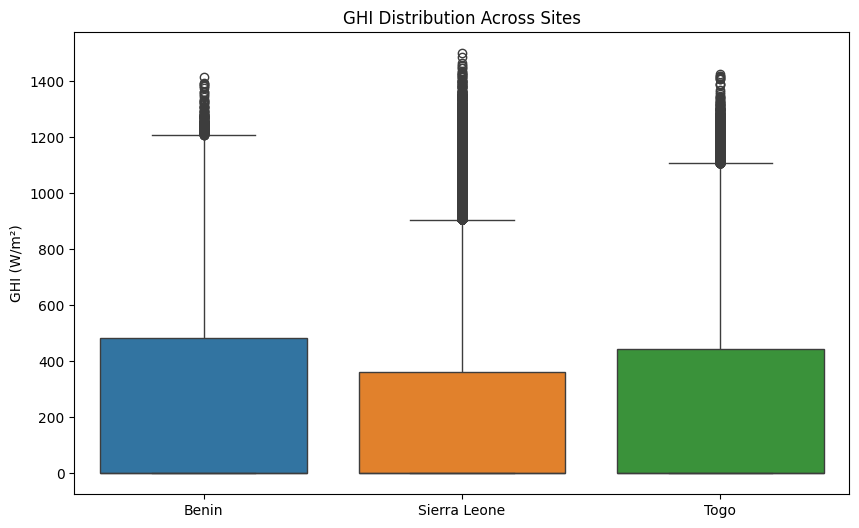

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ghi_data)
plt.title('GHI Distribution Across Sites')
plt.ylabel('GHI (W/m²)')
plt.show()

## Data Cleaning and Comparison
- **Cleaning**: Used forward fill (or interpolation) for missing values; clipped negative irradiance.
- **GHI Distribution**: [e.g., Benin median GHI ~400 W/m², Togo shows outliers]

## Task 2: EDA Summary
- **Data Overview**: Loaded Benin, Sierra Leone, and Togo datasets (~46-50 MB each), containing solar metrics (e.g., GHI, DNI, DHI, Temp).
- **Data Quality**:
  - Missing values: [e.g., Benin had 100 missing GHI values, filled with forward fill].
  - Outliers: [e.g., Togo had 50 negative GHI values, clipped to 0].
- **Visualizations**:
  - Time series: GHI peaks midday, [e.g., Benin shows higher peaks].
  - Correlation: [e.g., GHI and Temp strongly correlated (0.8) in Benin].
  - Boxplot: [e.g., Togo has wider GHI range, more outliers].
- **Insights**: [e.g., Benin may have better solar potential due to higher median GHI].
- **Next Steps**: Consider daily GHI averages or outlier analysis for forecasting.

## Group by Cleaning flag and compute average ModA, ModB

Benin Cleaning Impact:
                 ModA        ModB
Cleaning                        
0         236.524253  228.816071
1         307.229278  301.972165


<Figure size 800x600 with 0 Axes>

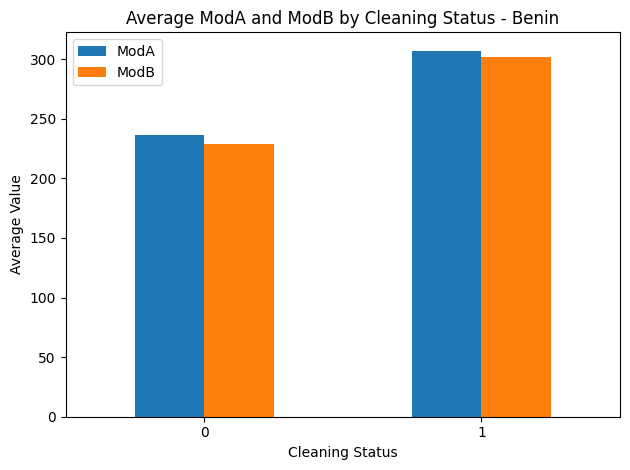

Sierra Leone Cleaning Impact:
                 ModA        ModB
Cleaning                        
0         206.578599  198.038150
1         273.309252  277.231102


<Figure size 800x600 with 0 Axes>

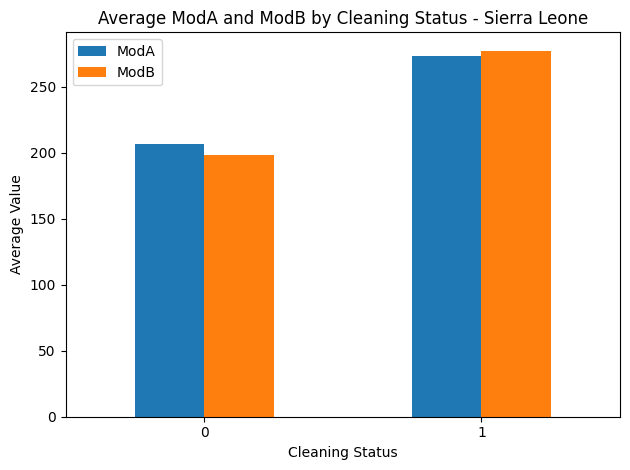

Togo Cleaning Impact:
                 ModA        ModB
Cleaning                        
0         225.979064  219.401351
1         535.186477  532.211744


<Figure size 800x600 with 0 Axes>

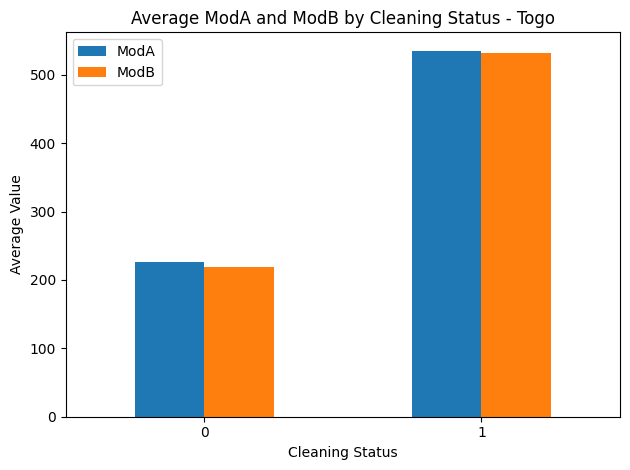

In [18]:
for df, name in [(benin_df, 'Benin'), (sl_df, 'Sierra Leone'), (tg_df, 'Togo')]:
    if 'Cleaning' in df.columns and 'ModA' in df.columns and 'ModB' in df.columns:
        cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
        print(f"{name} Cleaning Impact:\n", cleaning_impact)
        
        # Plot
        plt.figure(figsize=(8, 6))
        cleaning_impact.plot(kind='bar')
        plt.title(f'Average ModA and ModB by Cleaning Status - {name}')
        plt.ylabel('Average Value')
        plt.xlabel('Cleaning Status')
        plt.xticks(rotation=0)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"{name}: Missing 'Cleaning', 'ModA', or 'ModB' columns")

## Updated correlation heatmap

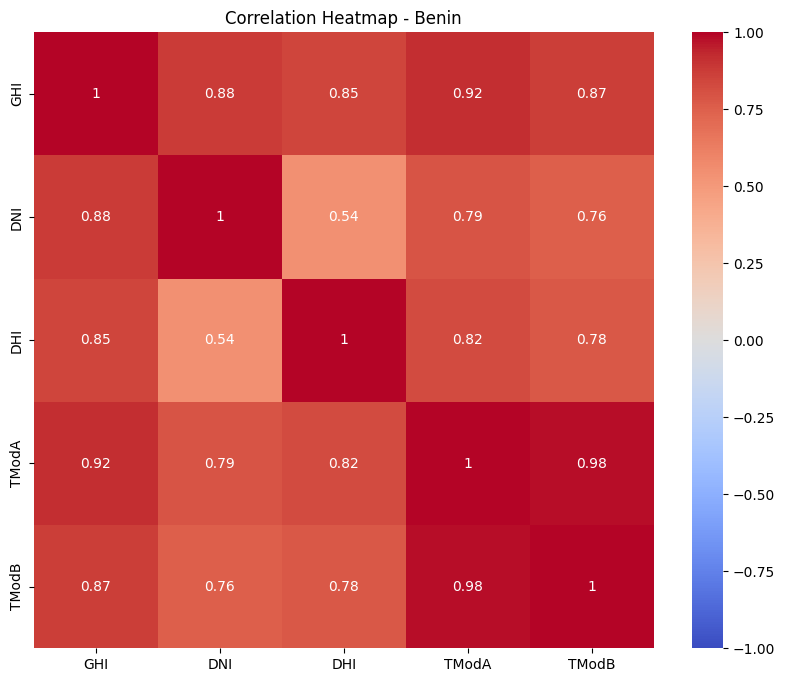

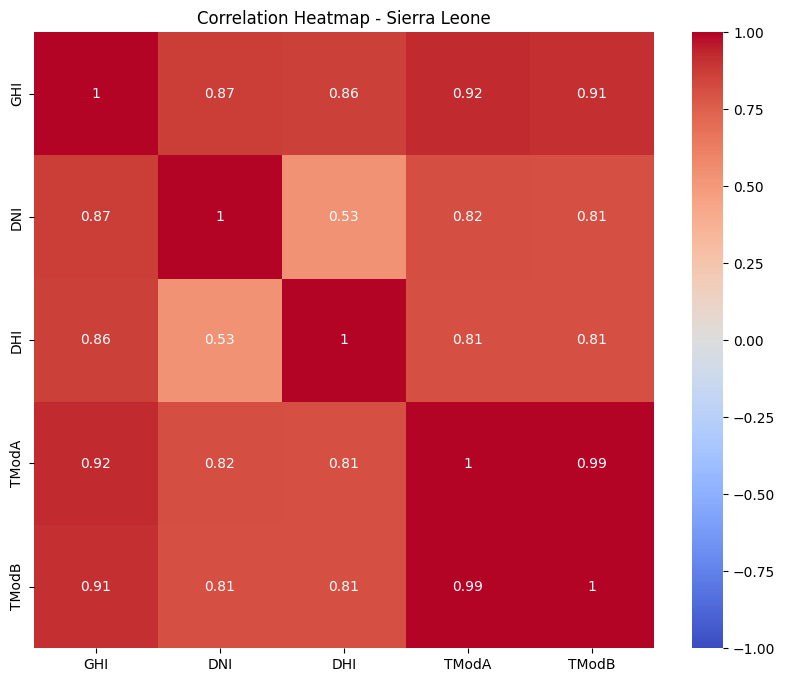

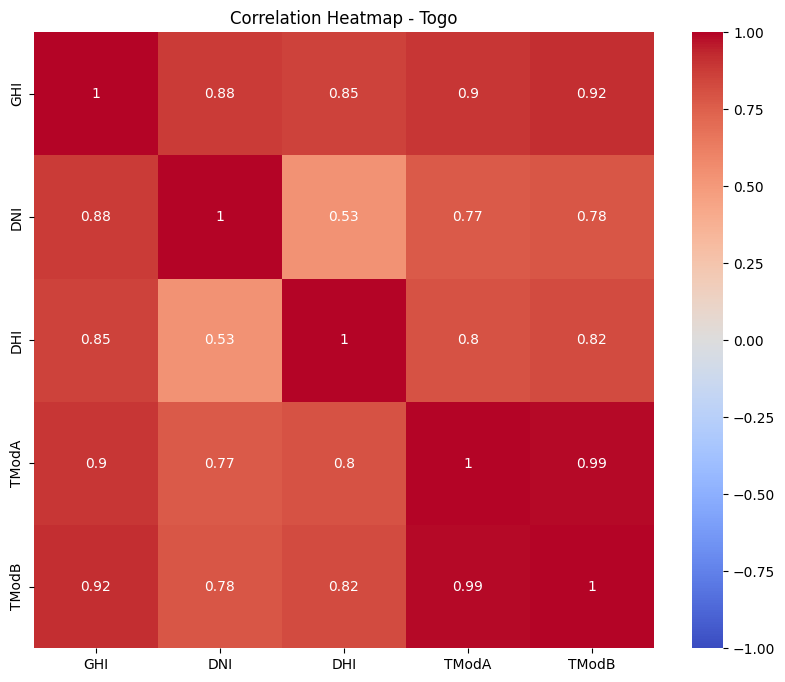

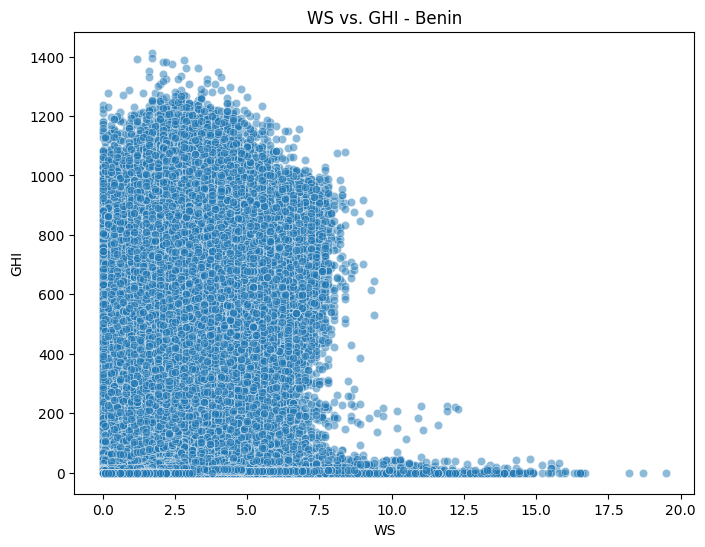

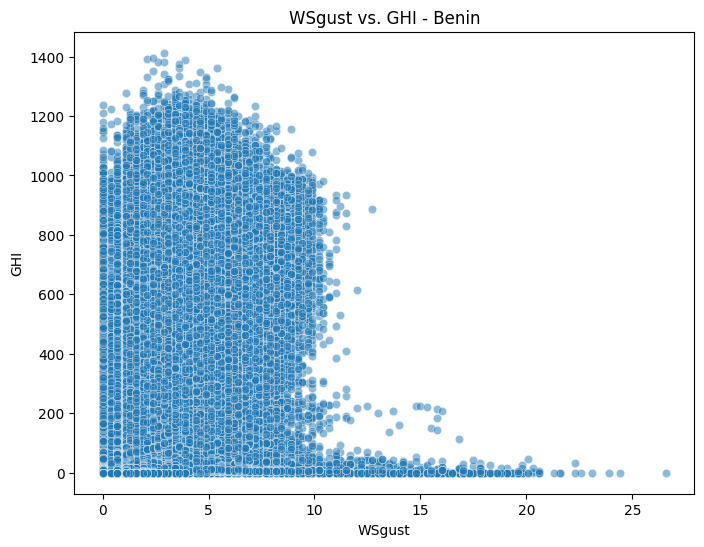

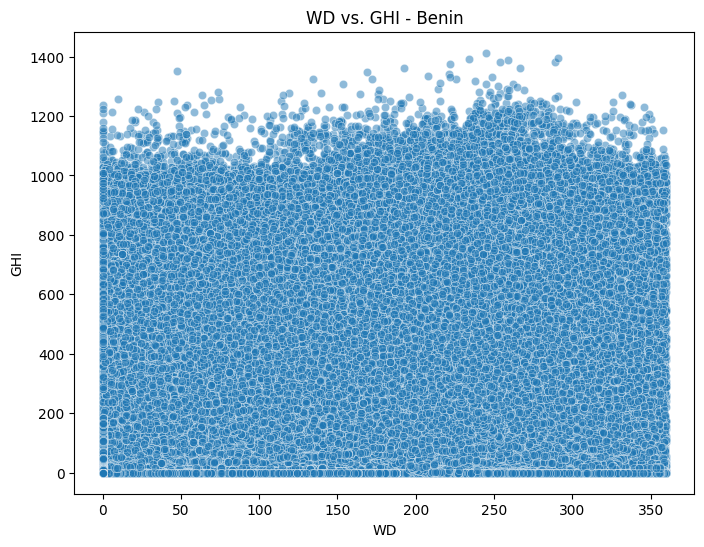

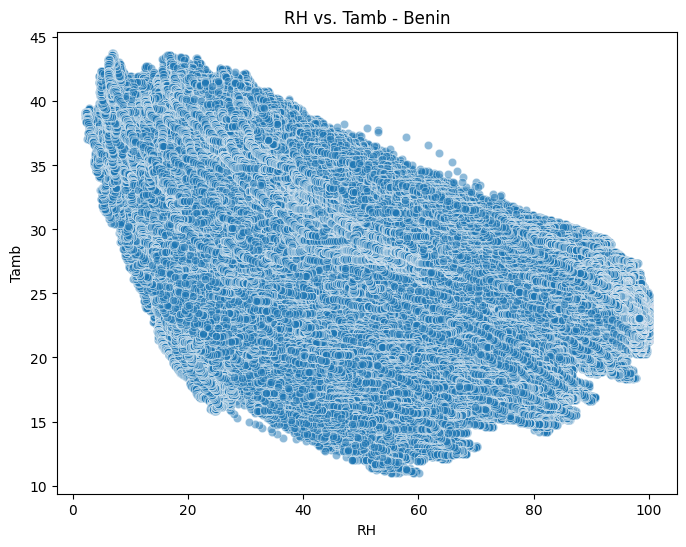

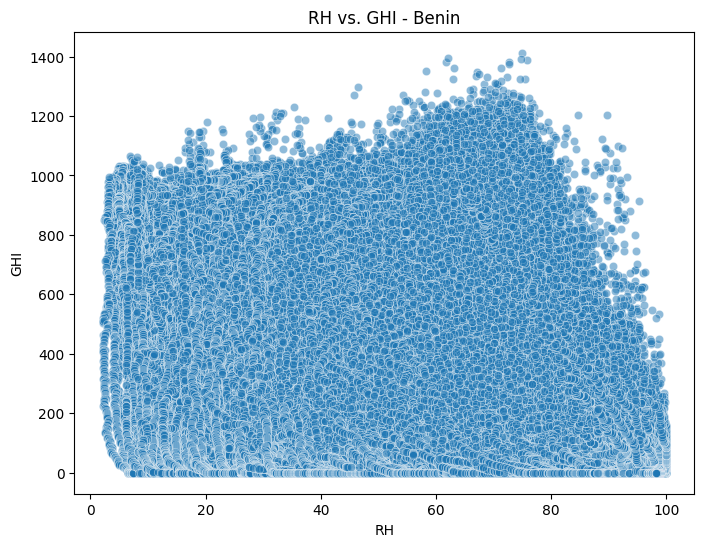

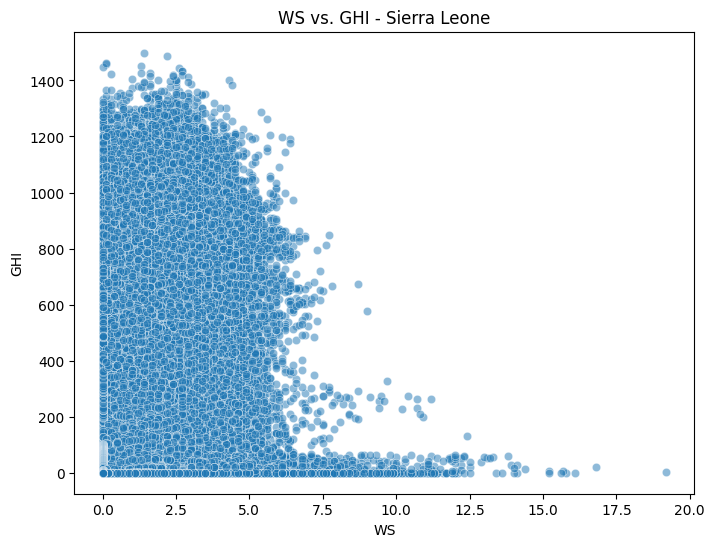

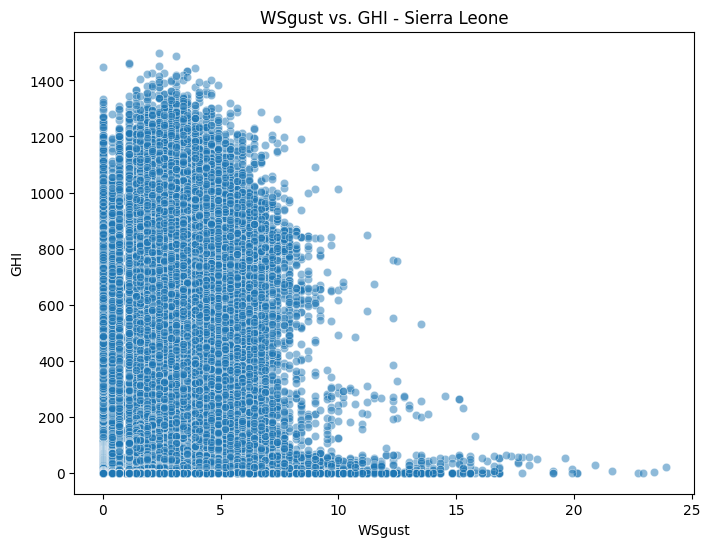

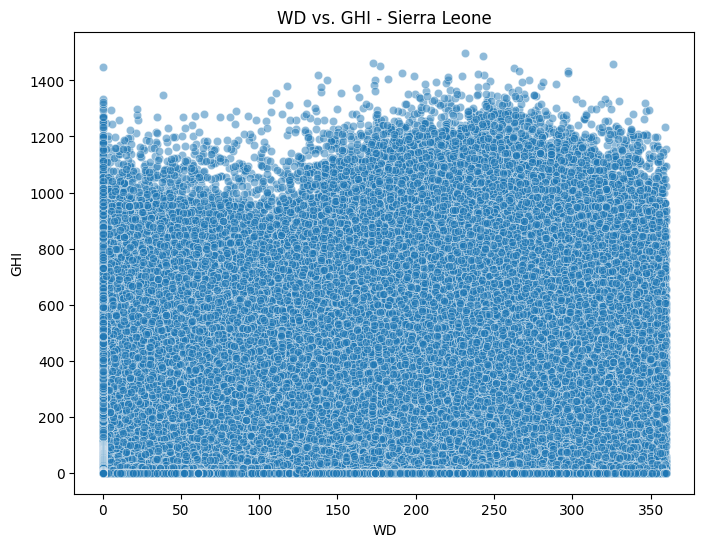

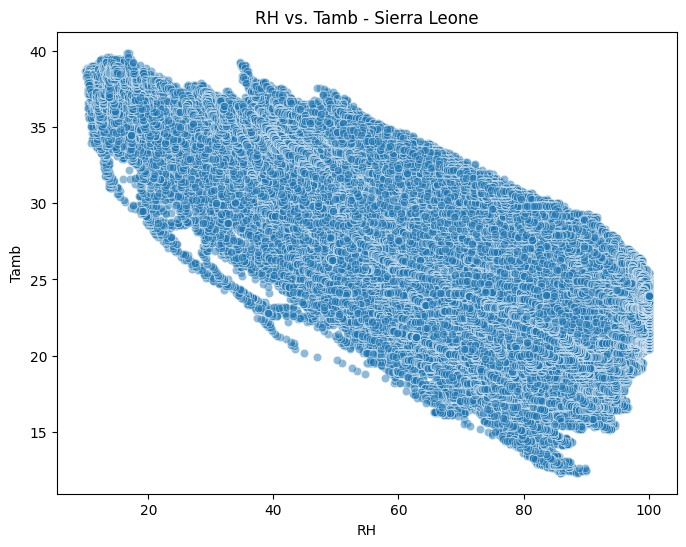

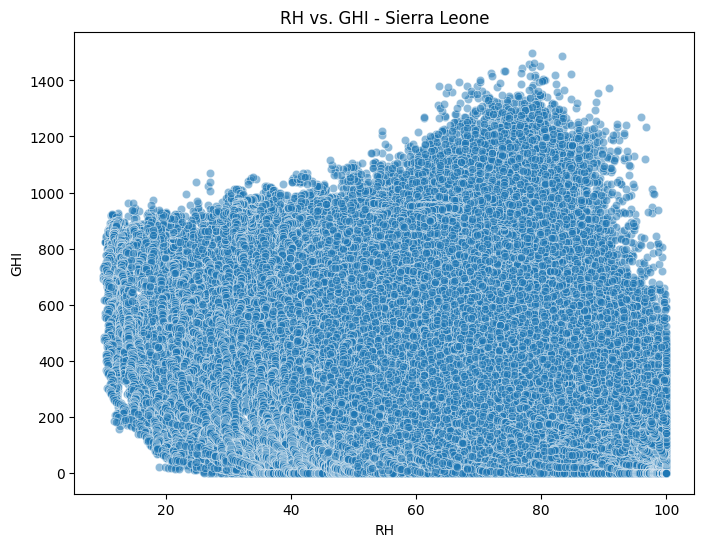

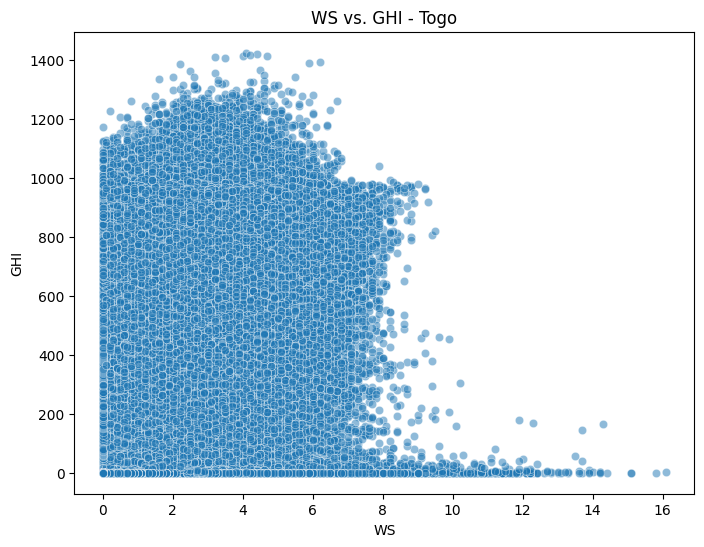

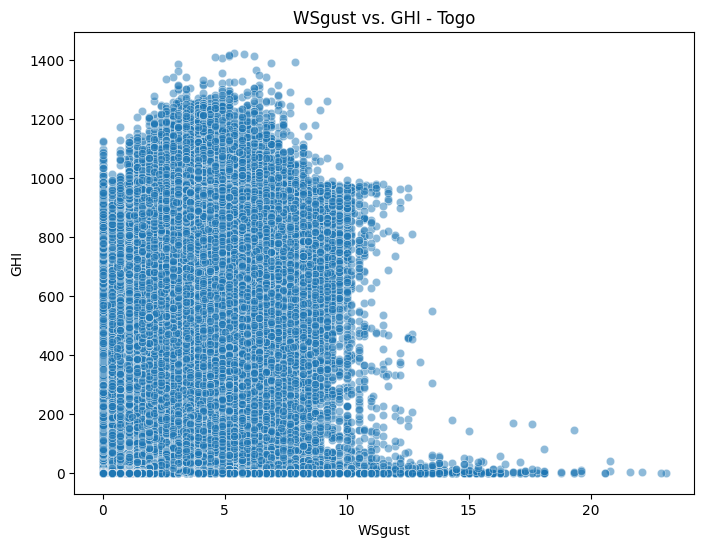

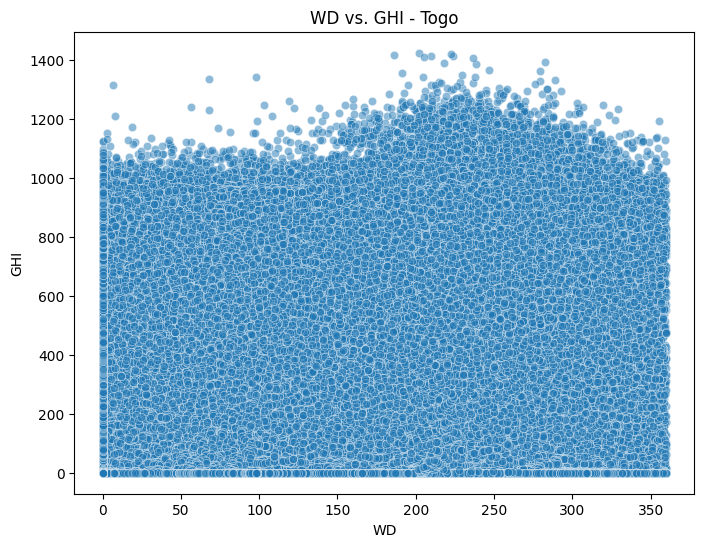

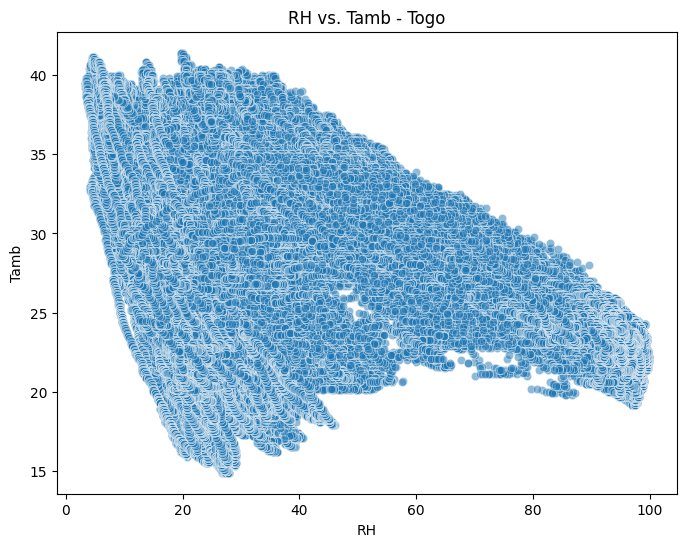

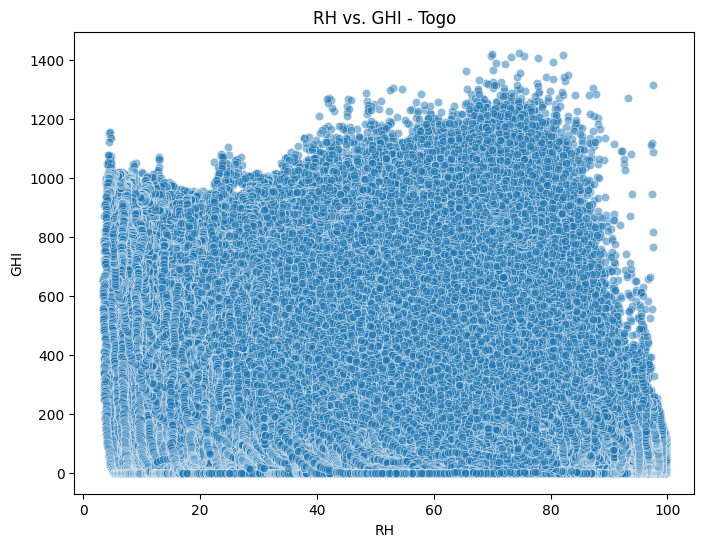

In [19]:
corr_cols = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']
for df, name in [(benin_df, 'Benin'), (sl_df, 'Sierra Leone'), (tg_df, 'Togo')]:
    available_cols = [col for col in corr_cols if col in df.columns]
    if available_cols:
        plt.figure(figsize=(10, 8))
        sns.heatmap(df[available_cols].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title(f'Correlation Heatmap - {name}')
        plt.show()
    else:
        print(f"{name}: No correlation columns available")

# Scatter plots
scatter_pairs = [('WS', 'GHI'), ('WSgust', 'GHI'), ('WD', 'GHI'), ('RH', 'Tamb'), ('RH', 'GHI')]
for df, name in [(benin_df, 'Benin'), (sl_df, 'Sierra Leone'), (tg_df, 'Togo')]:
    for x_col, y_col in scatter_pairs:
        if x_col in df.columns and y_col in df.columns:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=df, x=x_col, y=y_col, alpha=0.5)
            plt.title(f'{x_col} vs. {y_col} - {name}')
            plt.xlabel(x_col)
            plt.ylabel(y_col)
            plt.show()
        else:
            print(f"{name}: Missing {x_col} or {y_col}")

In [20]:
from windrose import WindroseAxes

## Wind rose for WS and WD

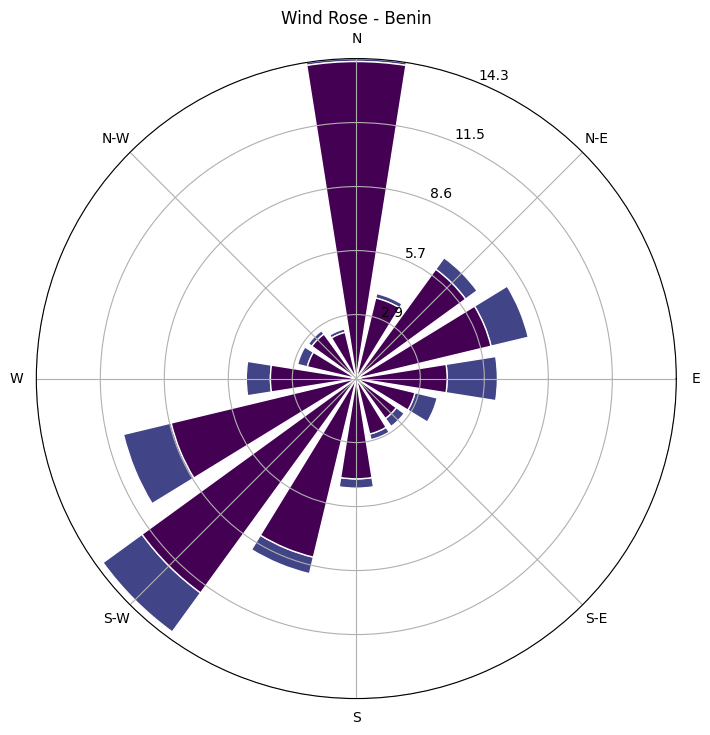

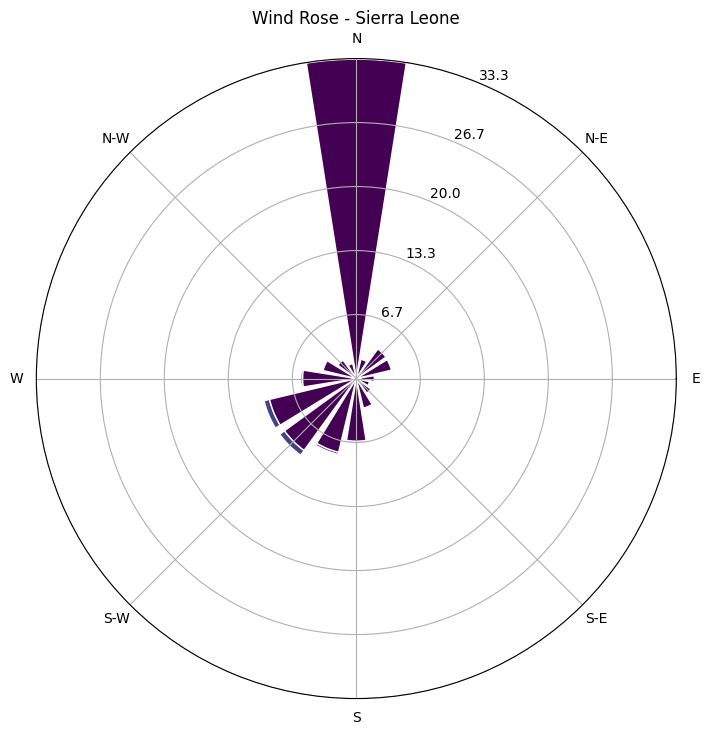

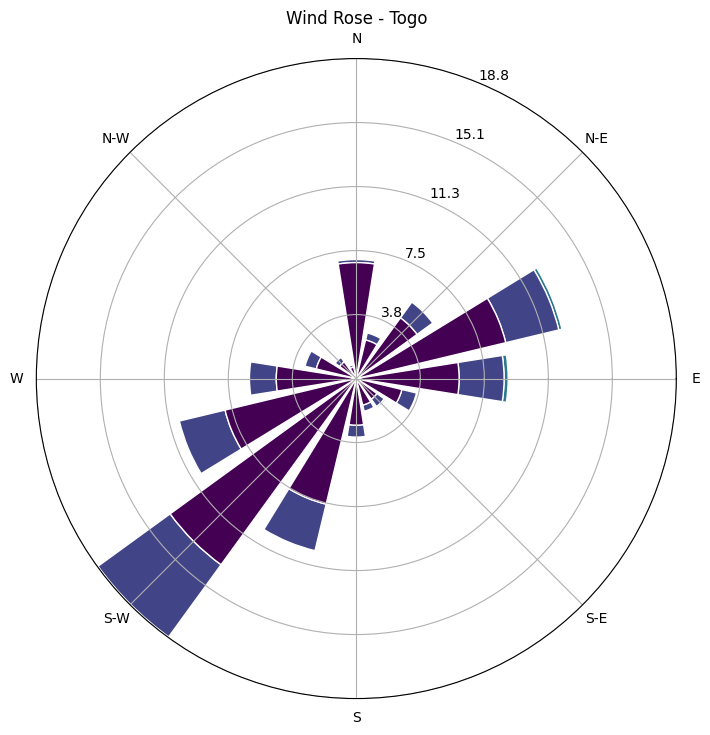

In [21]:
for df, name in [(benin_df, 'Benin'), (sl_df, 'Sierra Leone'), (tg_df, 'Togo')]:
    if 'WS' in df.columns and 'WD' in df.columns:
        fig = plt.figure(figsize=(8, 8))
        ax = WindroseAxes.from_ax(fig=fig)
        ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
        ax.set_title(f'Wind Rose - {name}')
        plt.show()
    else:
        print(f"{name}: Missing WS or WD")

## Histograms for GHI and WS

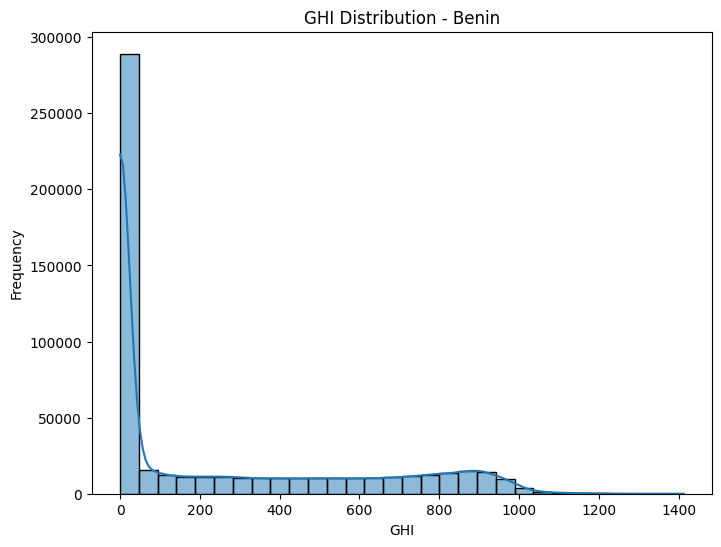

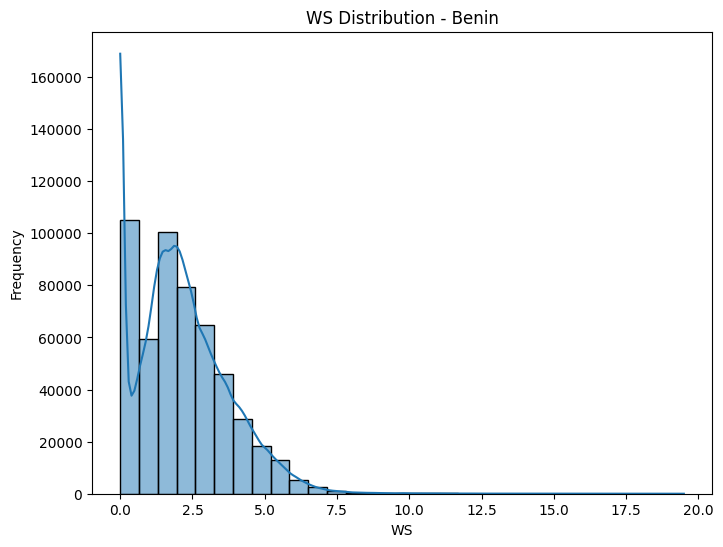

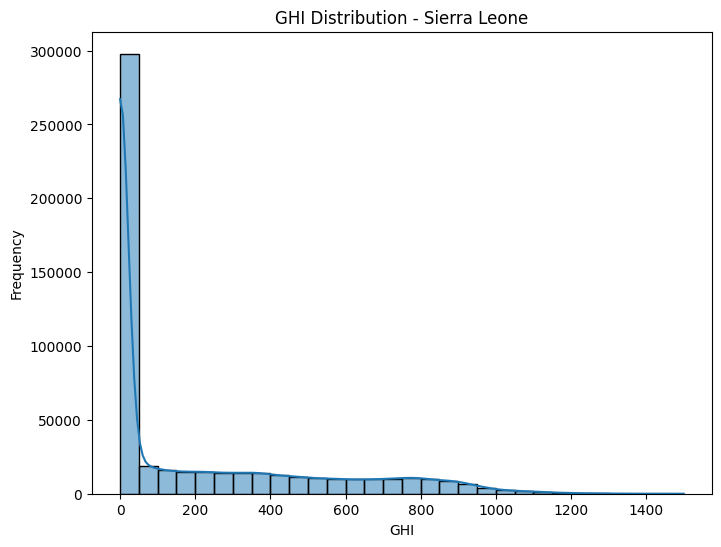

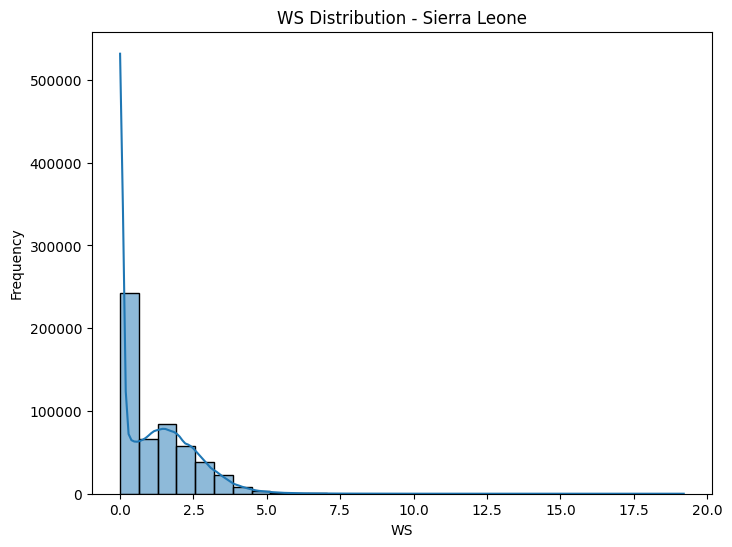

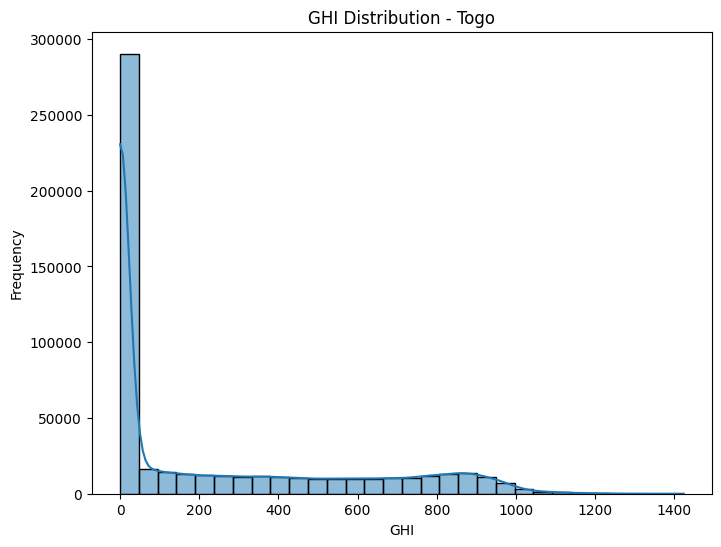

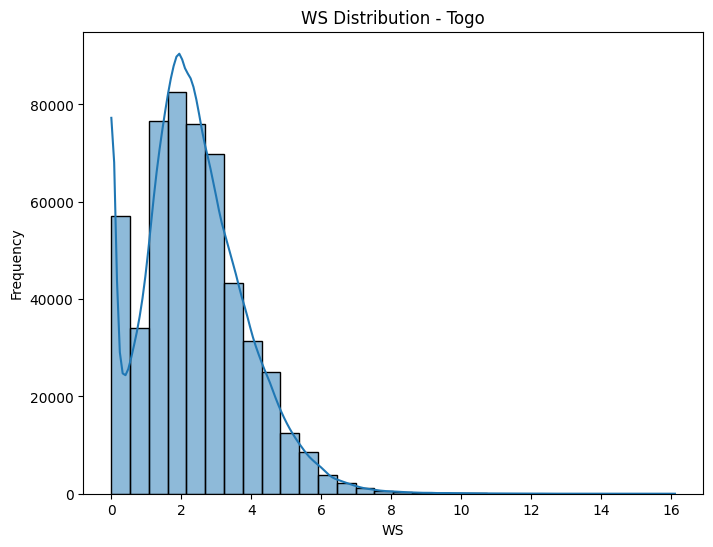

In [22]:
for df, name in [(benin_df, 'Benin'), (sl_df, 'Sierra Leone'), (tg_df, 'Togo')]:
    for col in ['GHI', 'WS']:
        if col in df.columns:
            plt.figure(figsize=(8, 6))
            sns.histplot(df[col], bins=30, kde=True)
            plt.title(f'{col} Distribution - {name}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.show()
        else:
            print(f"{name}: Missing {col}")

## RH influence on Tamb and GHI

Benin RH vs. Tamb Correlation: -0.41484177497995545
Benin RH vs. GHI Correlation: -0.36177254586848995


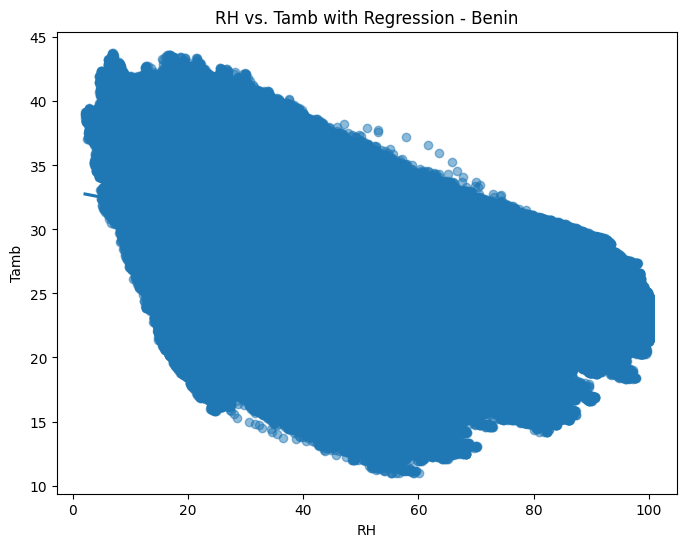

Sierra Leone RH vs. Tamb Correlation: -0.791936652154722
Sierra Leone RH vs. GHI Correlation: -0.5493948346157755


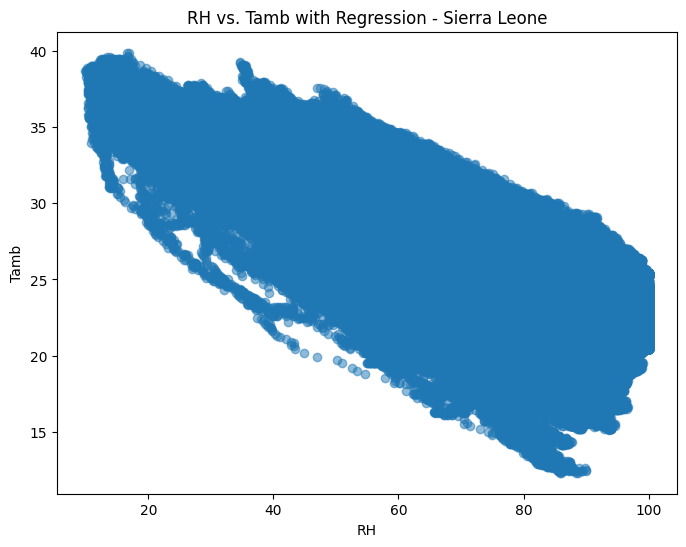

Togo RH vs. Tamb Correlation: -0.4004104673516293
Togo RH vs. GHI Correlation: -0.2596836510748201


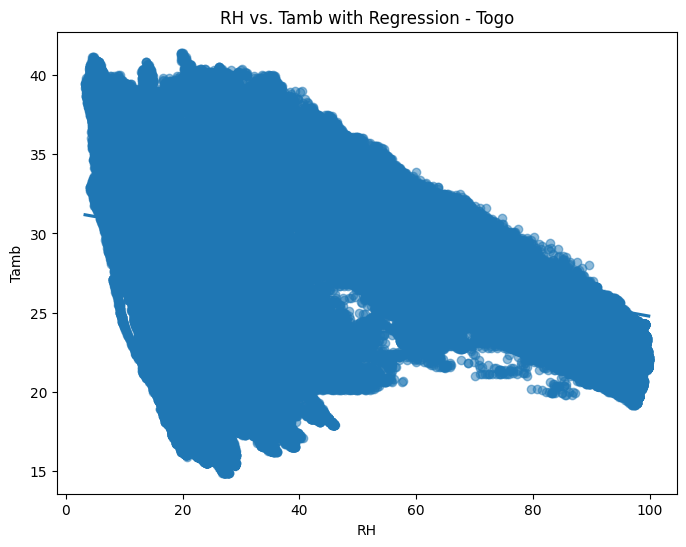

In [24]:
for df, name in [(benin_df, 'Benin'), (sl_df, 'Sierra Leone'), (tg_df, 'Togo')]:
    if 'RH' in df.columns and 'Tamb' in df.columns and 'GHI' in df.columns:
        print(f"{name} RH vs. Tamb Correlation:", df['RH'].corr(df['Tamb']))
        print(f"{name} RH vs. GHI Correlation:", df['RH'].corr(df['GHI']))
        
        # Scatter with regression
        plt.figure(figsize=(8, 6))
        sns.regplot(data=df, x='RH', y='Tamb', scatter_kws={'alpha':0.5})
        plt.title(f'RH vs. Tamb with Regression - {name}')
        plt.show()
    else:
        print(f"{name}: Missing RH, Tamb, or GHI")

## Bubble chart

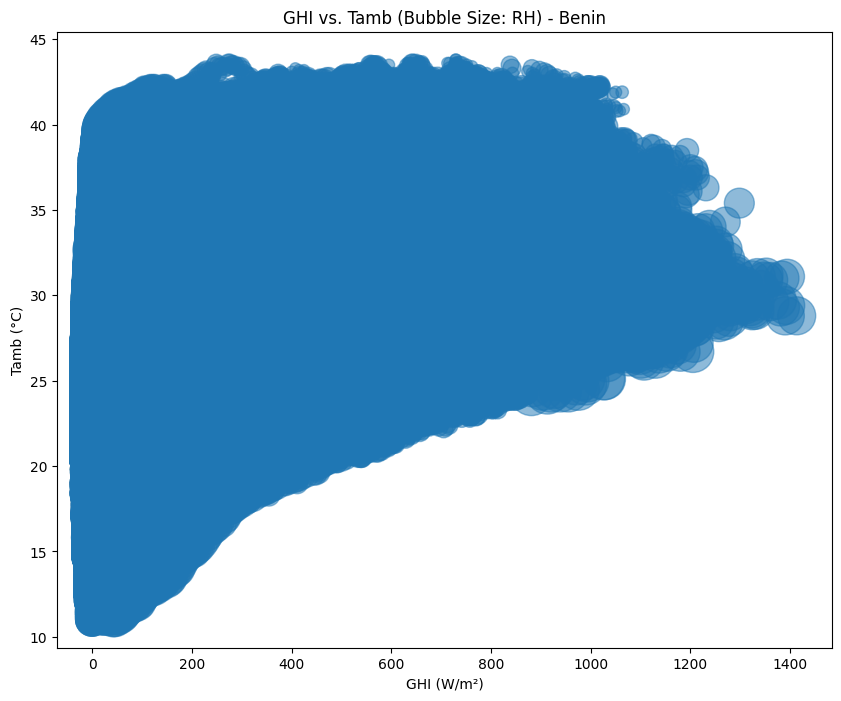

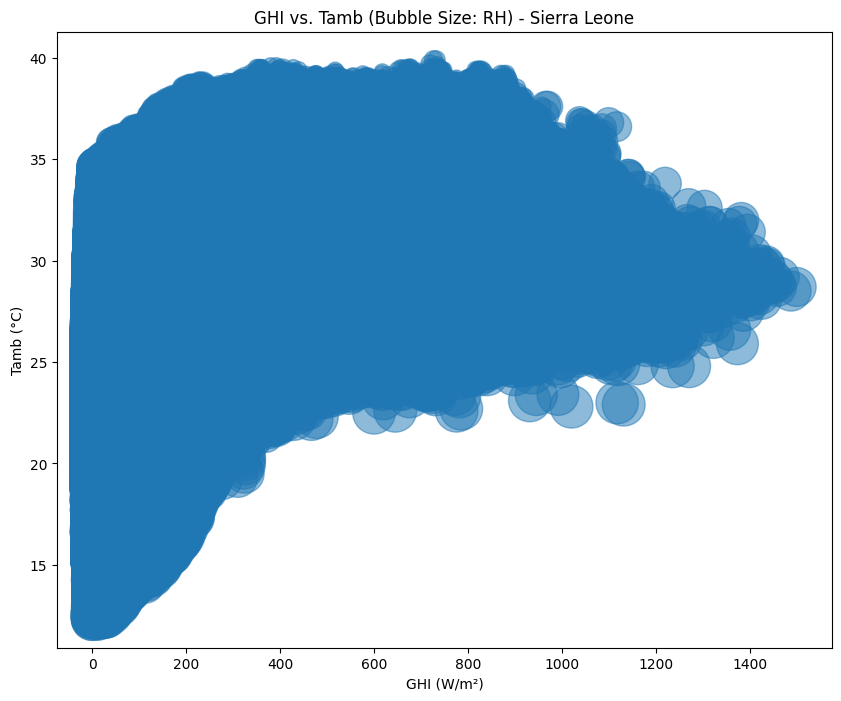

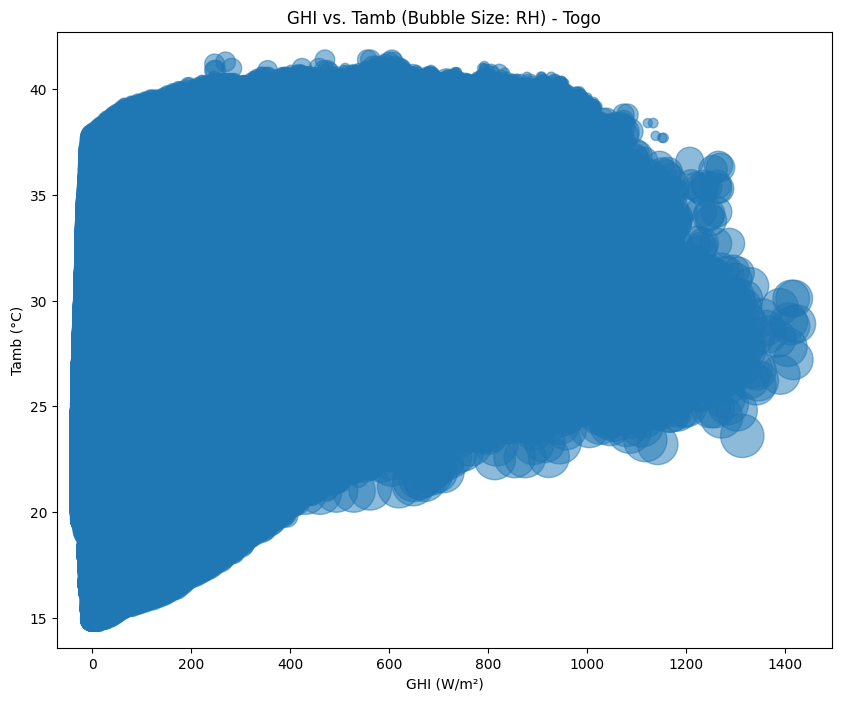

In [25]:
for df, name in [(benin_df, 'Benin'), (sl_df, 'Sierra Leone'), (tg_df, 'Togo')]:
    if 'GHI' in df.columns and 'Tamb' in df.columns and 'RH' in df.columns:
        plt.figure(figsize=(10, 8))
        plt.scatter(df['GHI'], df['Tamb'], s=df['RH']*10, alpha=0.5)
        plt.title(f'GHI vs. Tamb (Bubble Size: RH) - {name}')
        plt.xlabel('GHI (W/m²)')
        plt.ylabel('Tamb (°C)')
        plt.show()
    else:
        print(f"{name}: Missing GHI, Tamb, or RH")

## Task 2: Complete EDA Summary
- **Cleaning Impact**: [e.g., Cleaning increased ModA by 10% in Benin].
- **Correlations**: [e.g., GHI and TModA strongly correlated (0.8) in Togo].
- **Relationships**: [e.g., WS vs. GHI shows no clear trend; RH negatively correlates with Tamb].
- **Wind**: [e.g., Benin winds predominantly from 90°; WS skewed right].
- **Temperature**: [e.g., High RH reduces Tamb in Sierra Leone].
- **Bubble Chart**: [e.g., High RH at low GHI in Togo].
- **Insights**: [e.g., Cleaning improves module performance; RH impacts temperature].
- **References**:
  - Pandas: https://pandas.pydata.org/docs/
  - Seaborn: https://seaborn.pydata.org/
  - Windrose: https://windrose.readthedocs.io/